In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy.stats import linregress

In [5]:
fish_info = pd.read_excel("fish_info.xlsx")
fish_info['Fish ID'] = fish_info['Fish ID'].astype('str')
fish_info['Carcass Status'] = fish_info['Carcass Status'].astype('int8')
fish_info.set_index('Fish ID', inplace=True)
fish_info

,Age,Total length (cm),Fork length(cm),Total Weight (kg),Fulton Condition factor (K),Day fish observed dead,Decomposition,Carcass Status
Fish ID,,,,,,,,
1,41,214.5,193,46.6,0.47,2011-08-01,advanced,3
2,41,189.0,167,43.2,0.64,2026-08-01,fresh,2
3,60*,221.0,205,39.4,0.37,2026-08-01,advanced,3
4,40,189.0,169,34.8,0.52,2027-08-01,fresh,2
5,63,251.0,228,67.9,0.43,2027-08-01,fresh,2
6,NaN,NaN,NaN,NaN,NaN,2028-08-01,fresh,4
7,55,NaN,229*,82.0,NaN,2028-08-01,fresh,2
8,NaN,NaN,NaN,NaN,NaN,2028-08-01,fresh,4
9,NaN,NaN,NaN,NaN,NaN,2028-08-01,fresh,4


In [6]:
data = pd.read_excel("matlab_XLR.xlsx", sheet_name="Results Summary")
vn = data.columns
lt_track = np.zeros(data.shape, dtype = "bool")
for i in np.arange(3, len(vn)):
    lt_track[:, i] = ~(data[vn[i]].str.removeprefix("<") == data[vn[i]])
    temp = data[vn[i]].str.removeprefix("<")
    data[vn[i]] = temp
    
data

,Analyte,Lowest\nDetection Limit,Units,White Sturgeon (WS #1) MT,White Sturgeon (WS #2) MT,White Sturgeon (WS #3) MT,White Sturgeon (WS #4) MT,White Sturgeon (WS #5) MT,White Sturgeon (WS #7) MT,White Sturgeon (WS #10) MT,White Sturgeon (WS #11) MT,White Sturgeon (WS #13) MT,White Sturgeon (WS #1) Liver,White Sturgeon (WS #2) Liver,White Sturgeon (WS #4) Liver,White Sturgeon (WS #5) Liver,White Sturgeon (WS #7) Liver,White Sturgeon (WS #10) Liver,White Sturgeon (WS #11) Liver,White Sturgeon (WS #13) Liver
0,Moisture,0.500,%,73.0,70.7,66.0,72.8,74.9,72.9,77.5,72.7,77.7,58.2,50.1,69.8,62.5,57.2,55.6,63.3,75.4
1,Aluminum,2.000,mg/kg,10.0,18.0,2.0,37.0,2.0,2.8,2.4,2.5,4.4,7.2,3.7,9.7,3.8,9.4,9.8,7.9,26.4
2,Aluminum,0.400,mg/kg wwt,2.71,5.28,0.42,10.1,0.49,0.77,0.54,0.69,0.98,3.03,1.86,2.94,1.42,4.03,4.33,2.89,6.52
3,Antimony,0.010,mg/kg,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.023
4,Antimony,0.002,mg/kg wwt,0.0020,0.0022,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0021,0.0029,0.0024,0.0020,0.0037,0.0057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Vanadium,0.020,mg/kg wwt,0.020,0.020,0.020,0.044,0.020,0.020,0.020,0.020,0.020,0.341,0.178,0.177,0.190,0.300,0.282,0.164,0.555
65,Zinc,0.500,mg/kg,33.2,11.5,9.69,31.1,23.8,19.9,31.2,23.1,22.6,50.6,58.4,75.4,62.0,51.2,45.7,60.7,112
66,Zinc,0.100,mg/kg wwt,8.96,3.38,3.29,8.47,5.98,5.40,7.00,6.31,5.03,21.2,29.2,22.8,23.2,21.9,20.3,22.3,27.7
67,Zirconium,0.200,mg/kg,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20


/var/folders/nv/jxcc7s_s6gb0ldg9xxcxv95r0000gn/T/ipykernel_11660/3157826204.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 6), facecolor='white')


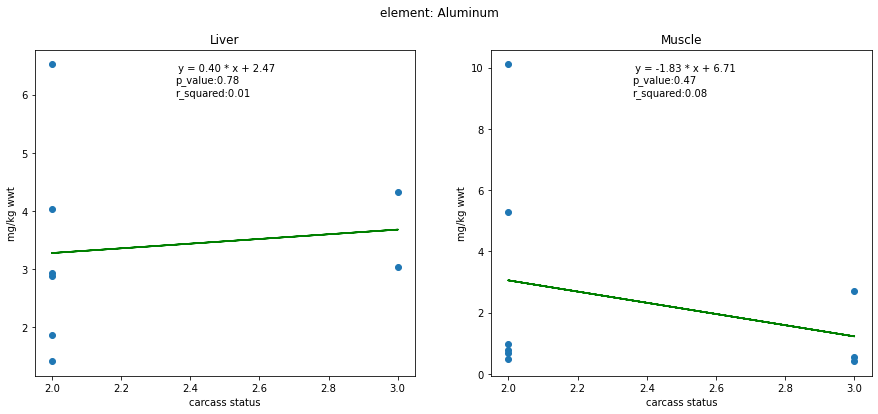

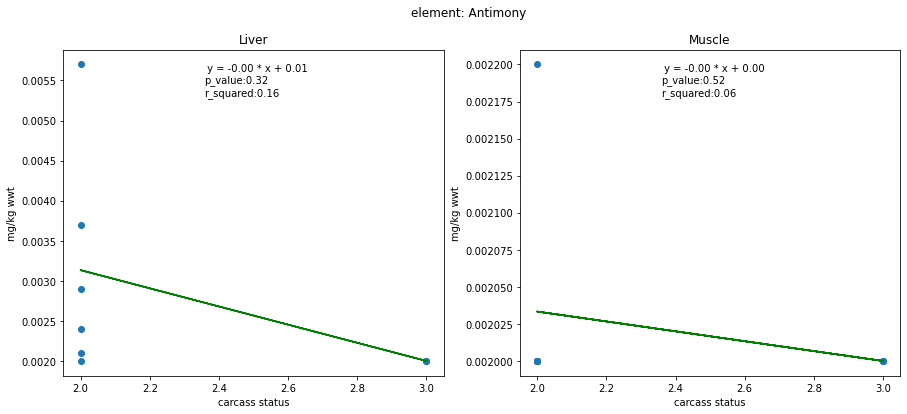

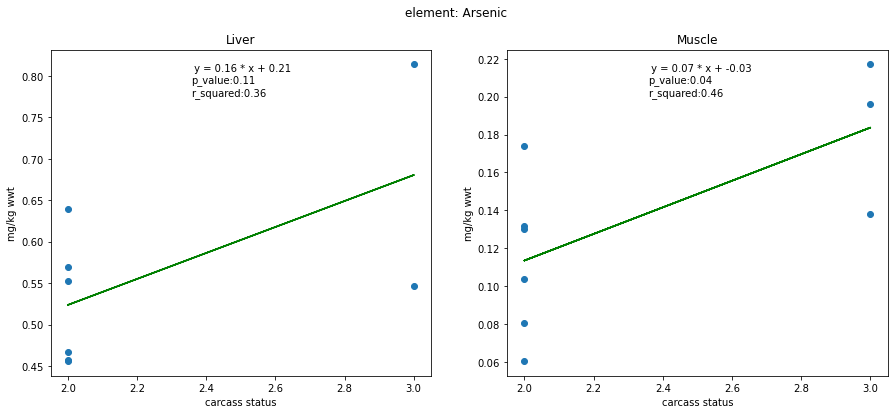

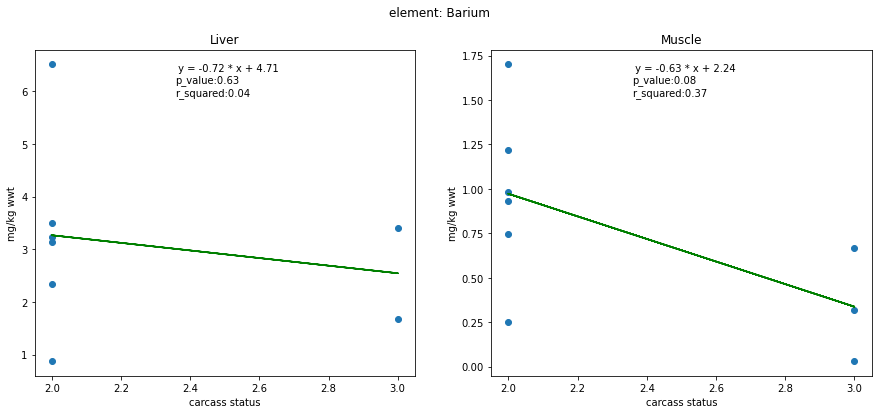

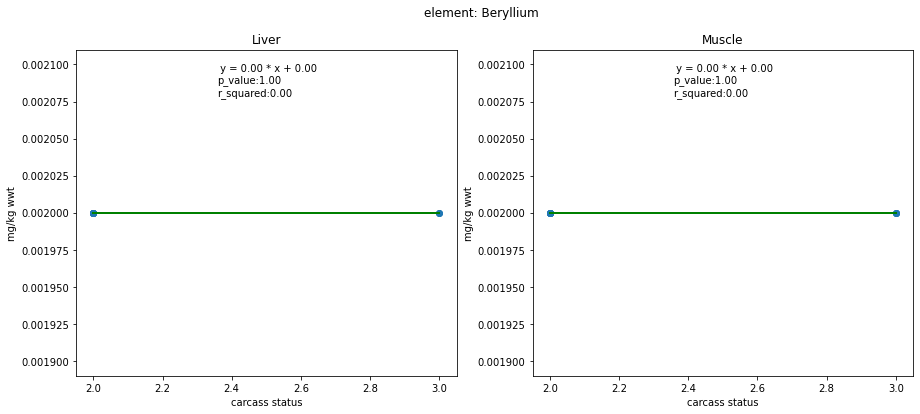

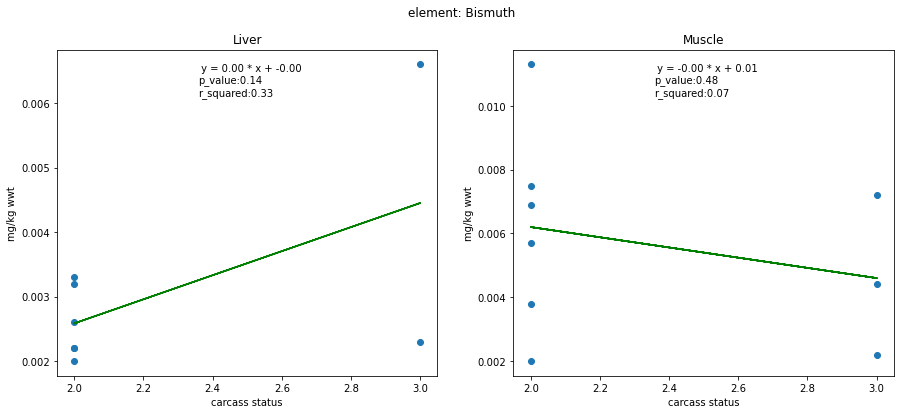

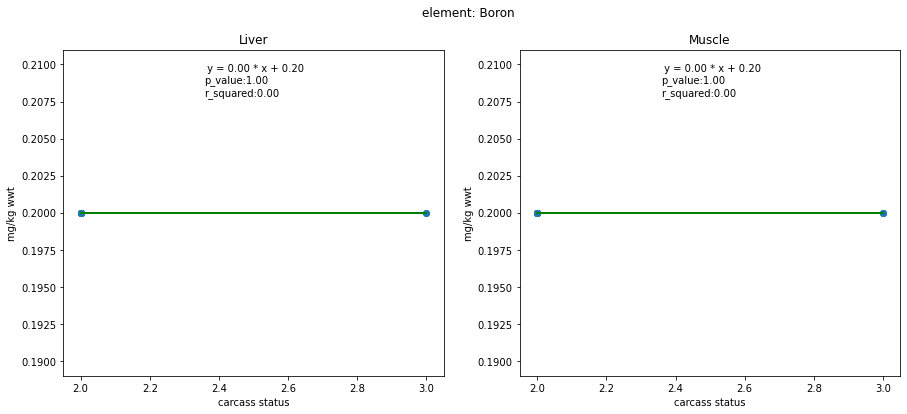

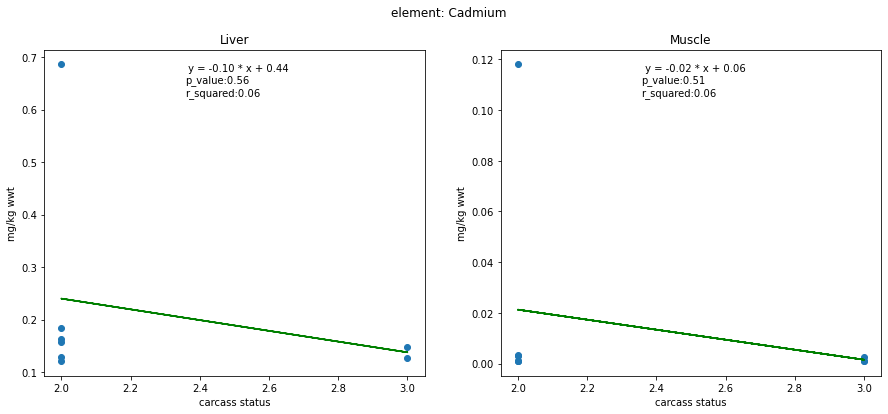

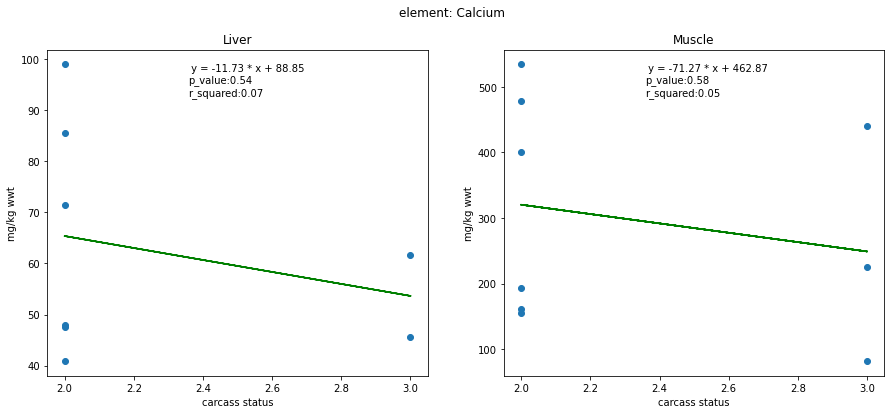

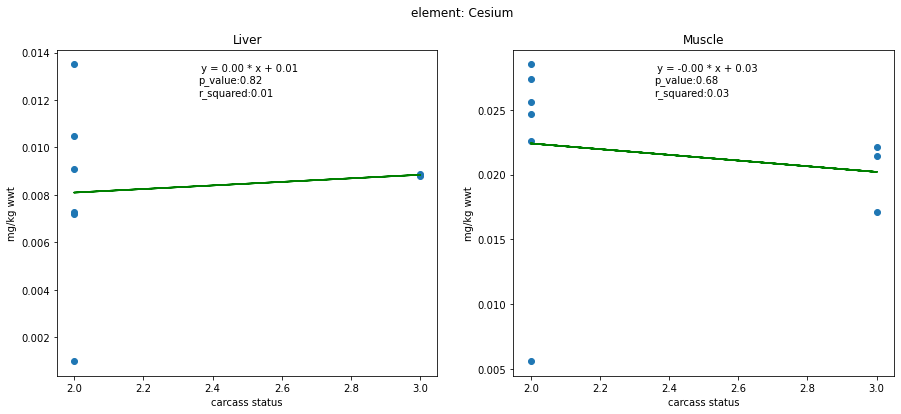

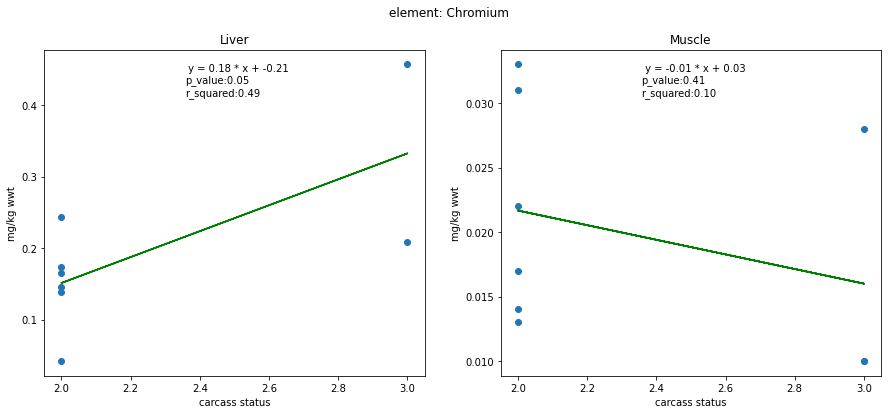

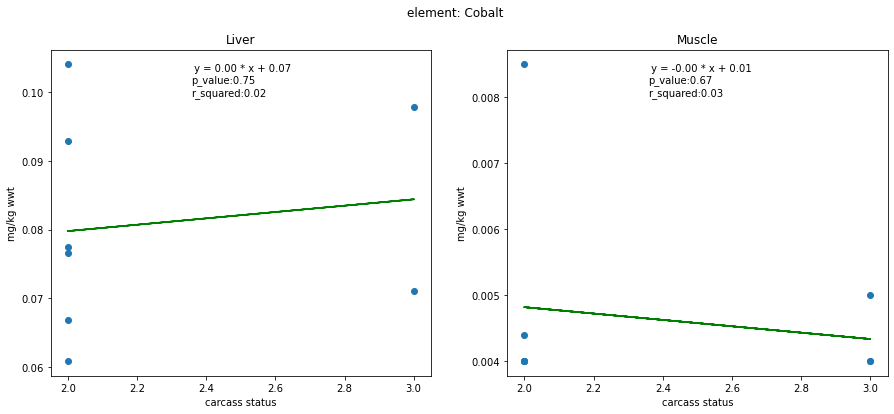

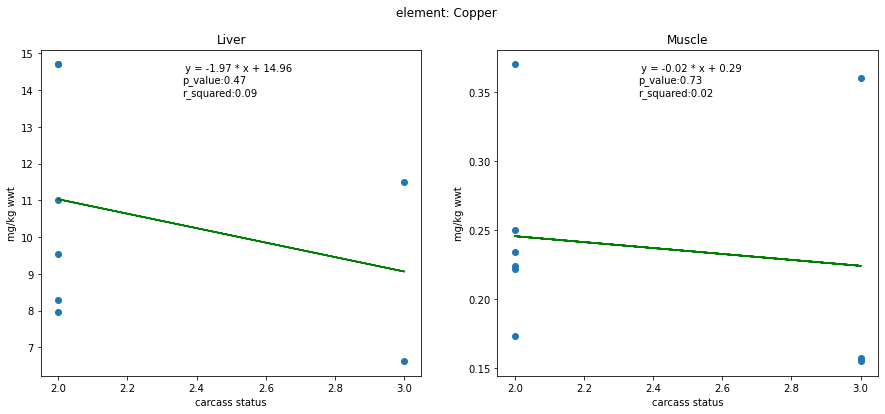

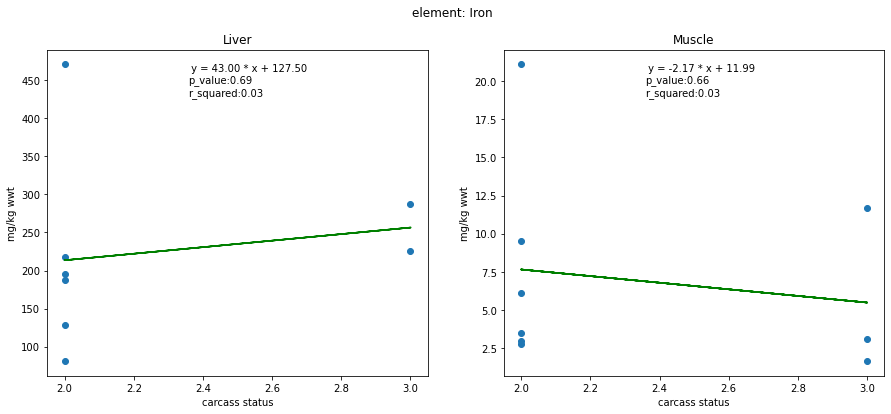

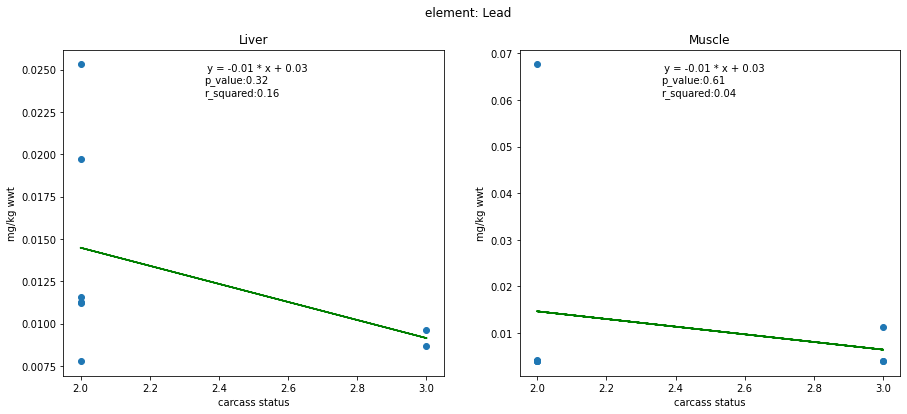

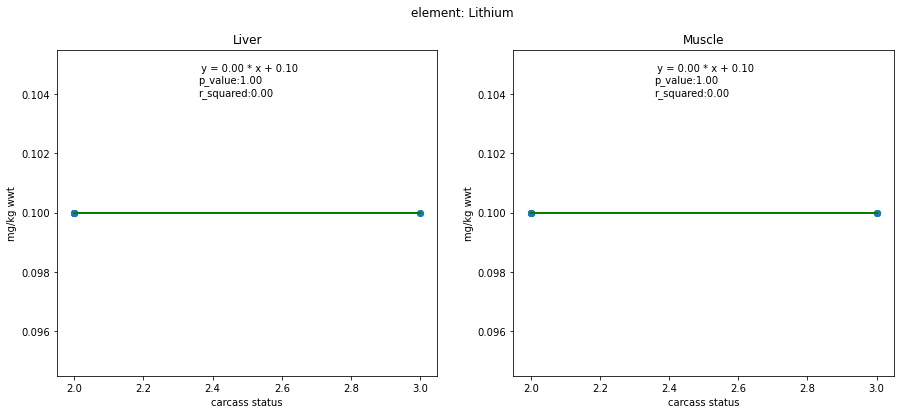

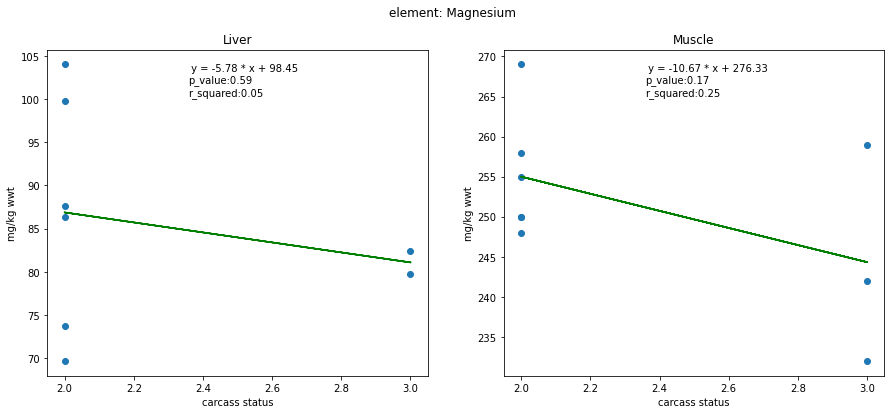

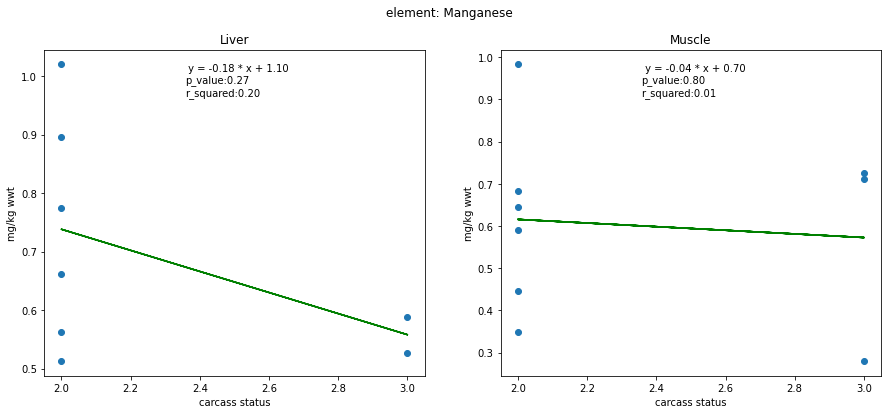

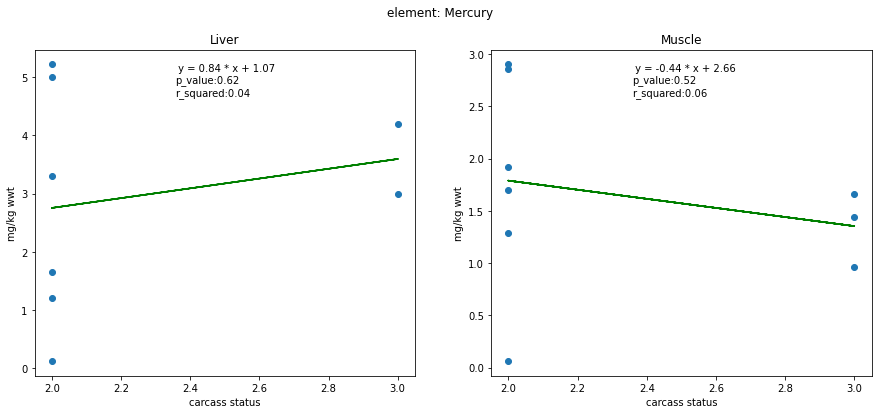

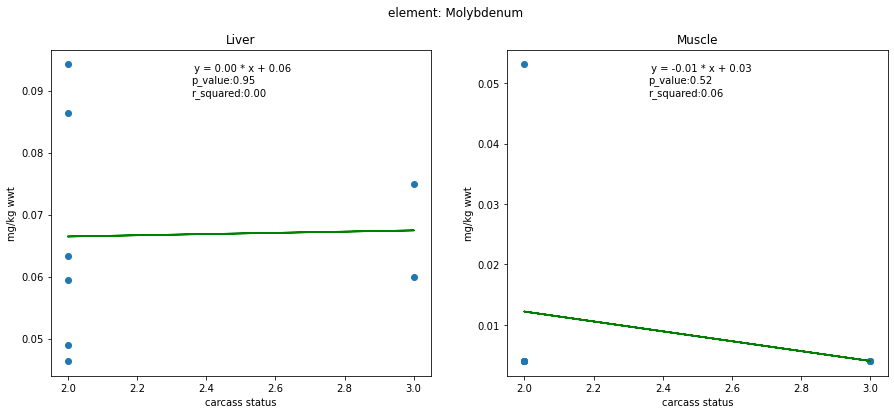

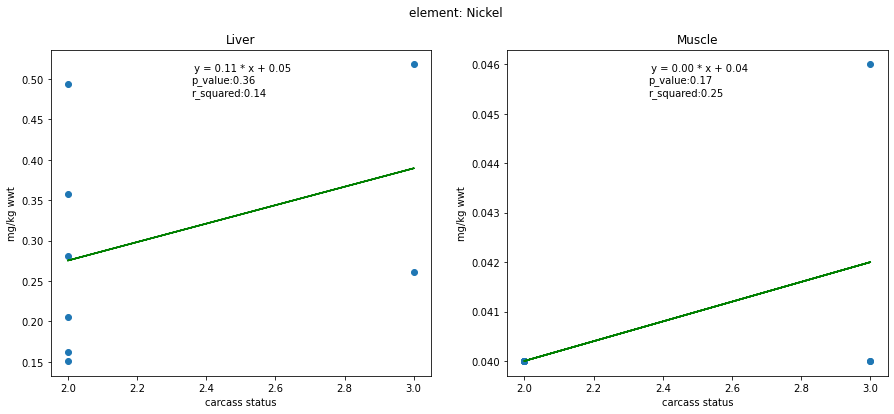

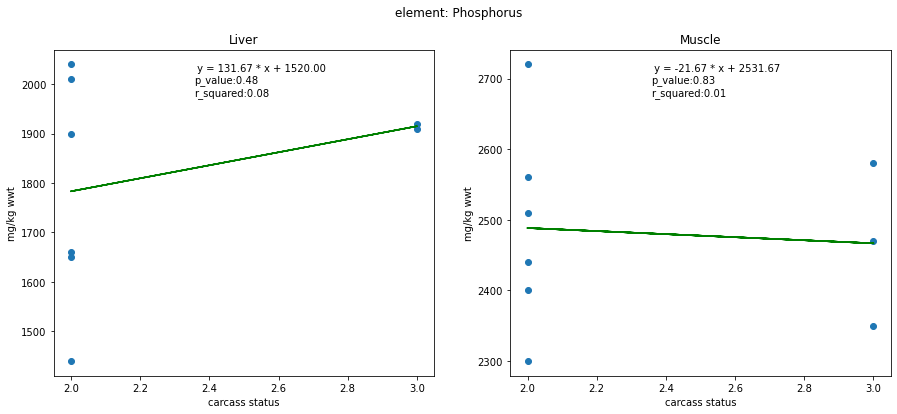

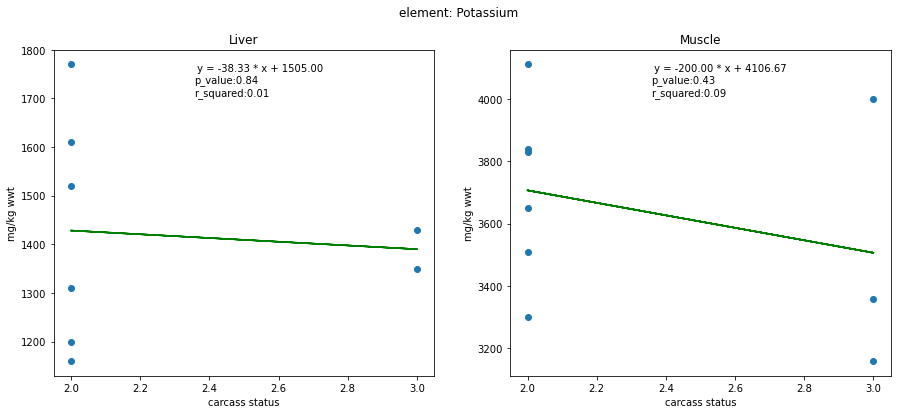

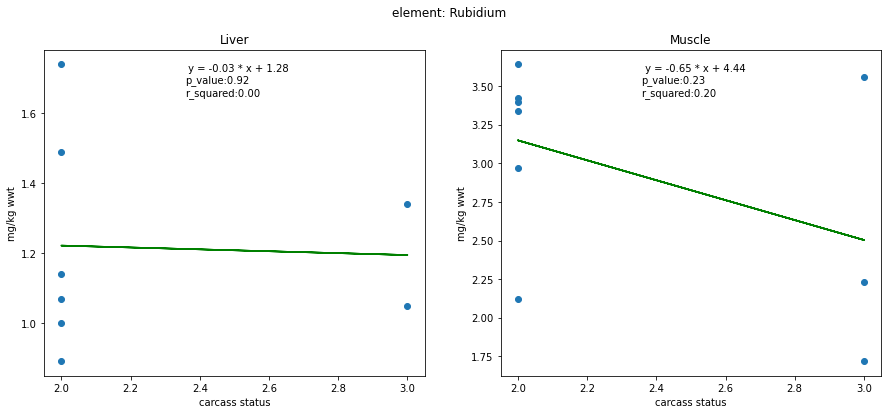

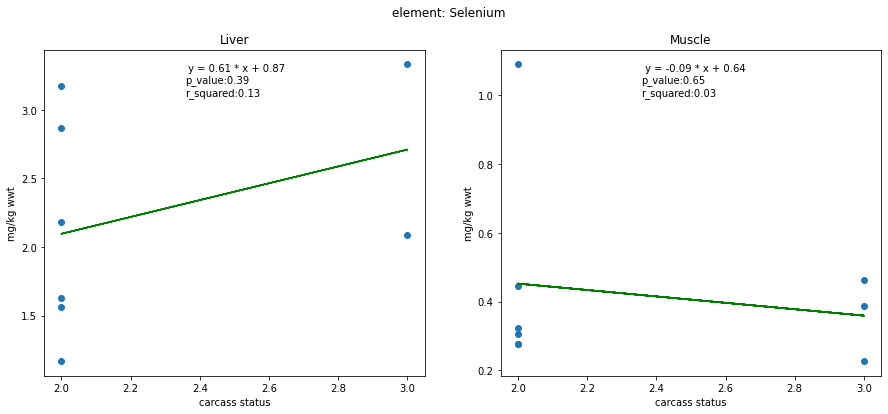

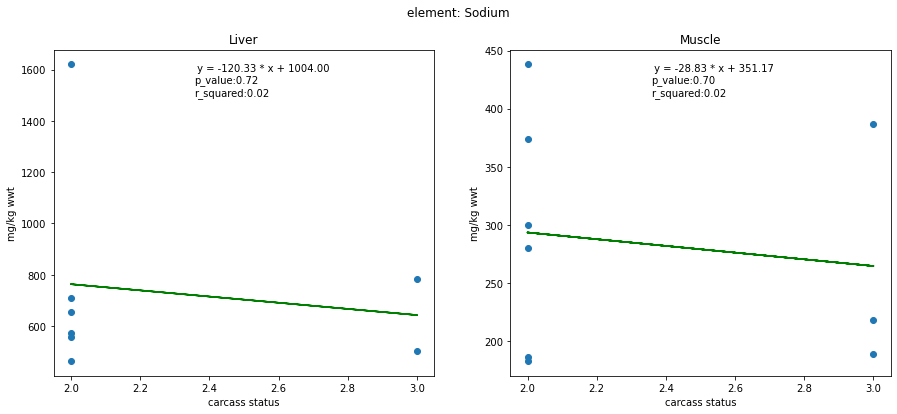

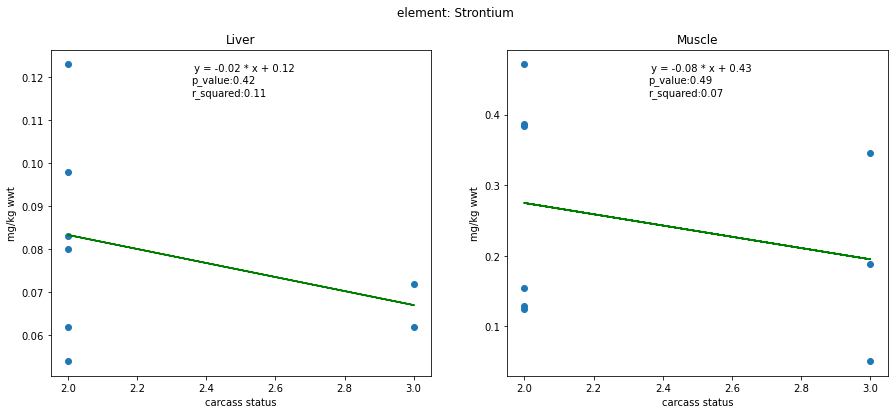

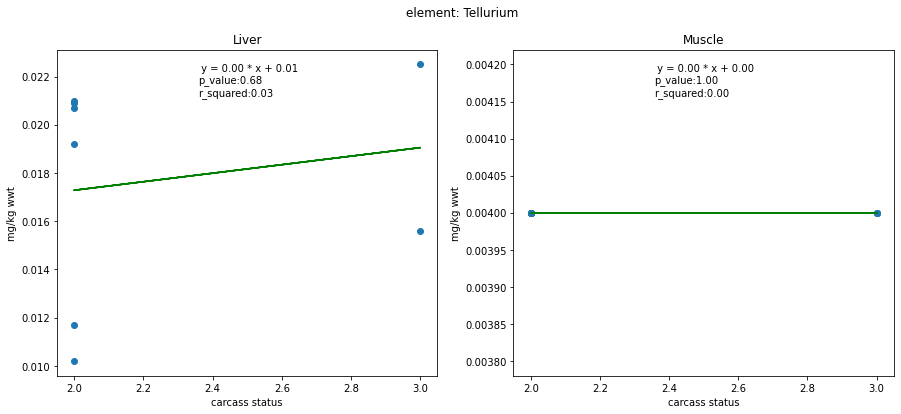

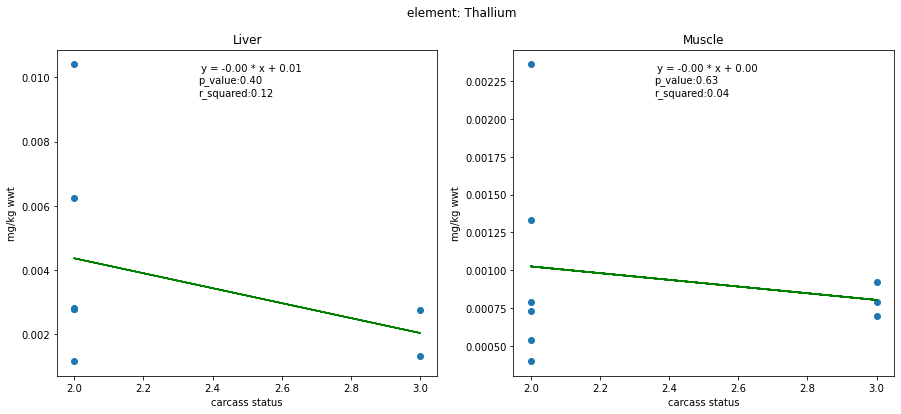

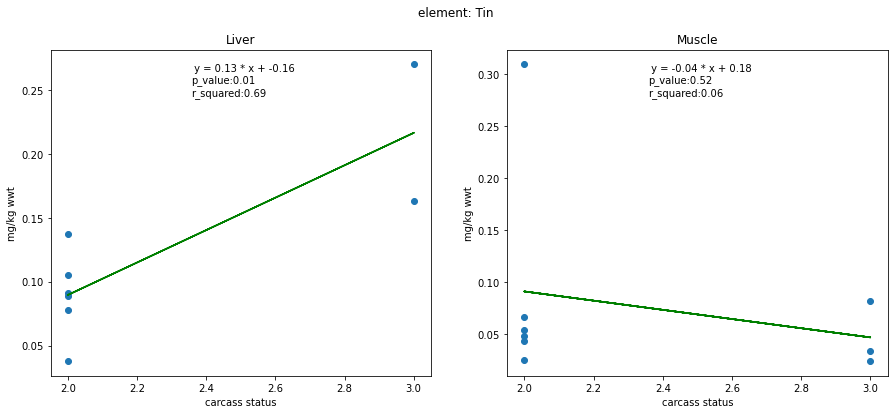

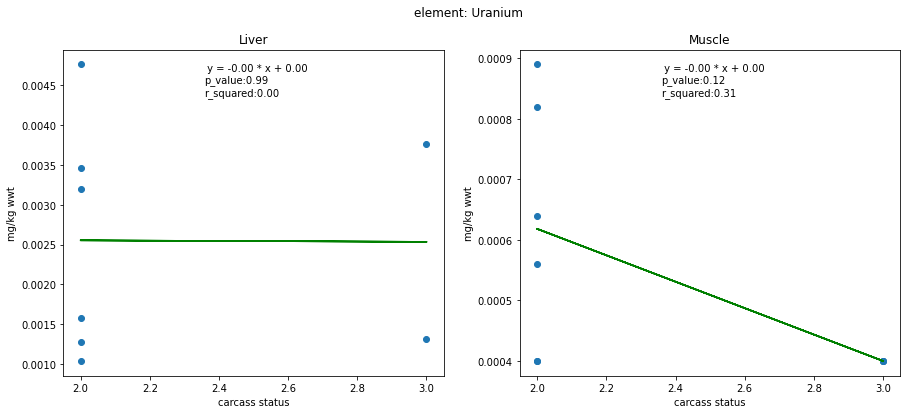

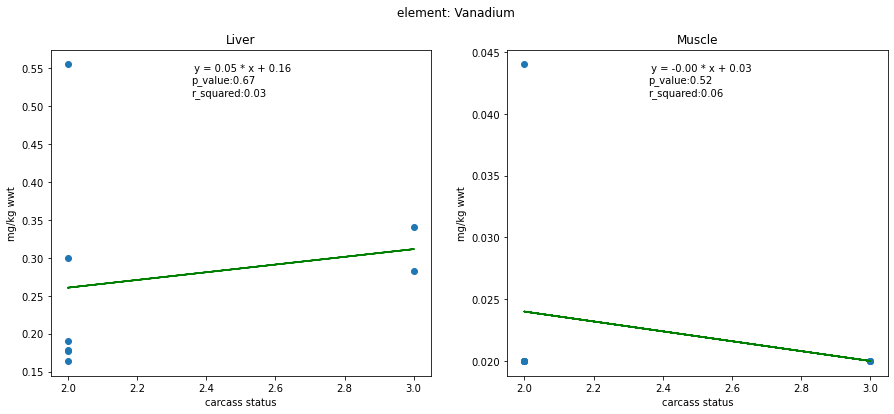

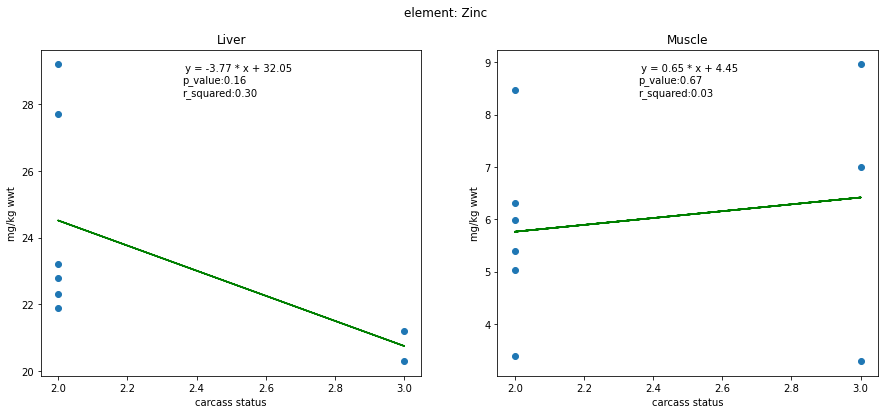

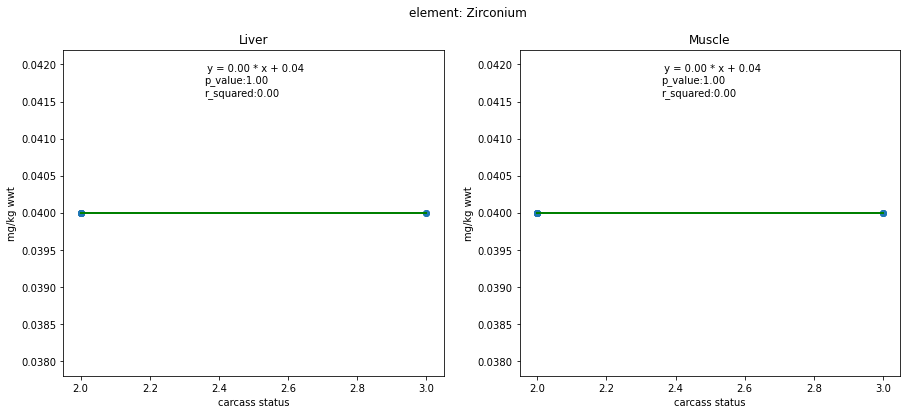

In [7]:
data = data.loc[data.Units.str.contains('wwt'), :]
liver_id = data.columns.str.contains('liver', case = False)
muscle_id = data.columns.str.contains('MT', case = False)

# ploting
col_liver = data.columns[liver_id].str.removeprefix('White Sturgeon (WS #').str.removesuffix(') Liver')
col_muscle = data.columns[muscle_id].str.removeprefix('White Sturgeon (WS #').str.removesuffix(') MT')
x_liver = fish_info.loc[col_liver, 'Carcass Status'].to_numpy('int')
x_muscle = fish_info.loc[col_muscle, 'Carcass Status'].to_numpy('int')


for element in data['Analyte']:
    plt.figure(figsize=(15, 6), facecolor='white')
    
    ## liver
    y = data.loc[data.Analyte == element, liver_id].to_numpy('float32')
    plt.subplot(1,2,1)
    plt.scatter(x_liver, y)
    plt.title('Liver')
    plt.xlabel('carcass status')
    plt.ylabel('mg/kg wwt')

    slope, intercept, r_value, p_value, std_err = linregress(x_liver, y)
    plt.plot(x_liver,slope * x_liver + intercept, label = 'linereg', color = 'green')
    plt.annotate(f' y = {slope:.2f} * x + {intercept:.2f}'+
                    "\n"+f'p_value:{p_value:.2f}' + "\n"+f'r_squared:{r_value ** 2:.2f}',
                    (np.mean(plt.xlim())-np.diff(plt.xlim())*.13, plt.ylim()[1]-np.diff(plt.ylim())*.14))

    # muscle
    y = data.loc[data.Analyte == element, muscle_id].to_numpy('float32')
    plt.subplot(1,2,2)
    plt.scatter(x_muscle, y)
    plt.title('Muscle')
    plt.xlabel('carcass status')
    plt.ylabel('mg/kg wwt')
    
    slope, intercept, r_value, p_value, std_err = linregress(x_muscle, y)
    plt.plot(x_muscle,slope * x_muscle + intercept, label = 'linereg', color = 'green')
    plt.annotate(f' y = {slope:.2f} * x + {intercept:.2f}'+
                    "\n"+f'p_value:{p_value:.2f}' + "\n"+f'r_squared:{r_value ** 2:.2f}',
                    (np.mean(plt.xlim())-np.diff(plt.xlim())*.13, plt.ylim()[1]-np.diff(plt.ylim())*.14))



    plt.suptitle(f'element: {element}');
    
    if not os.path.exists('./pics/carcass/'):
        os.mkdir('./pics/carcass/')
    plt.savefig(f'./pics/carcass/{element}.jpg')
    